# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.





Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [88]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden


### Füge hier alle benötigten Libaries ein:
---

In [89]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'scipy' ist bereits installiert.


## Manuelle Installation 
---

In [90]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [92]:
df = pd.read_csv(filepath_or_buffer= "Data/wage.csv", 
                 sep=';')

#### Begutachte deine Daten:

In [93]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [94]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

Anzahl der Reihen:  998
Anzahl der Spalten:  4


## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    998 non-null    float64
 1   educ    998 non-null    int64  
 2   exper   998 non-null    int64  
 3   metro   998 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 31.3 KB


Wir können auch *Datentypen* von Spalten ändern, um die Analyse zu erleichtern.

- *Datentypen* sind wichtig für die Analyse, da sie bestimmen, welche Operationen auf den Daten durchgeführt werden können.

Wenn wir ein `String` statt ein `int` haben können wir keine Rechen Operationen durchführen. 
Wie Mittelwert, Median, Standardabweichung, Varianz, etc.

- Daher ist es wichtig die *Datentypen* zu kennen und zu ändern.

In [96]:
#df['metro'] = df['metro'].astype('category')

Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [97]:
df.describe().round(2)


# save output of the describtion as a text file
with open('MLP_Output/out.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

Umgang mit NaN-Werten (Not a Number):
---
NaN Werte sind Daten die nicht richtig erhoben worden oder auch fehler enthalten

Beim Umgang mit fehlenden Werten in der Spalte "educ" (Bildungsjahre) sollte eine besonders sorgfältige Vorgehensweise angewendet werden.

**Frage: Kann man fehlende Werte in der Spalte "educ" sinnvoll ersetzen?**

Antwort: *Ja, aber mit Vorsicht.* 
Die Anzahl der Bildungsjahre kann möglicherweise durch den `Durchschnitt`, `Median` oder `Modus` ersetzt werden, aber dies muss mit Bedacht erfolgen. Der Grund ist, dass Bildung ein stark individueller Faktor ist und eine pauschale Ersetzung (z.B. mit dem `Mittelwert`) die Daten verfälschen könnte.
Wenn fehlende Werte in `"educ"` durch den Durchschnitt oder eine andere aggregierte Statistik ersetzt werden, kann dies dazu führen, dass wichtige individuelle Unterschiede verwischt werden. Das könnte letztlich das Modell in die Irre führen, da die Annahmen über die Bildungsjahre nicht korrekt widergespiegelt werden. Eine solche Verzerrung könnte die Ergebnisse von Modellen wie der Regressionsanalyse oder anderen maschinellen Lernverfahren erheblich beeinflussen und zu ungenauen Vorhersagen führen.

Statt pauschaler Ersetzungen sollten im besten Fall Strategien wie:

- Datenquellen ergänzen, um fehlende Werte zu rekonstruieren,
- Imputation mit verwandten Variablen (z.B. Alter, Berufserfahrung), oder
- Löschen betroffener Zeilen, wenn der Anteil fehlender Werte gering ist,
in Betracht gezogen werden, um die Verzerrung minimal zu halten.

In [98]:
df.isnull().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

In [99]:
# Entferne Zeilen mit fehlenden Werten (NaN)
df = df.dropna()


# Fülle NaN-Werte mit dem Durchschnitt jeder Spalte
#df = df.fillna(df.mean())


# Alternativ: Fülle NaN-Werte einer bestimmten Spalte (z.B. 'Wage') mit deren Durchschnitt
df['wage'] = df['wage'].fillna(df['wage'].mean())

## Filterung der Daten
---

Mit der Datenfilterung kannst du neue Einsichten für deine Daten erhalten.
Diese können wiederum in einer neuen `Variable` eingespeichert werden.

- `df`: Der DataFrame, der die ursprünglichen Daten enthält.

- `df["wage"] > 12.00`: Die Filterbedingung. Es wird überprüft, ob der Wert in der Spalte "wage" größer als 12.00 ist.

- `df[df["wage"] > 12.00]`: Das Ergebnis ist ein neuer DataFrame (df_filtered), der nur die Zeilen enthält, in denen der Wert in der Spalte "wage" größer als 12.00 ist.

In [100]:
df_filtered = df[df["wage"] > 12]
df_filtered

,wage,educ,exper,metro
698,12.020000,18,8,1
699,12.030000,16,1,1
700,12.030000,12,17,1
701,12.030000,16,14,1
702,12.030000,16,9,1
...,...,...,...,...
993,35.419998,18,23,1
994,36.840000,16,7,1
995,41.320000,16,11,1
996,47.220001,18,35,1


2. Filterung mit mehreren Konditionen

In [101]:
df_filtered_educ = df[(df["wage"] > 12)  &  # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1)] 

df_filtered_educ

,wage,educ,exper,metro
723,12.400000,12,25,0
760,13.100000,12,24,0
810,14.730000,12,42,0
862,16.209999,12,29,0
866,16.370001,12,22,0
902,18.330000,12,40,0
975,26.980000,12,45,0


# Visualisierungen:
---

Visualisierungen sind leicht zu erstellen und bieten oft wertvolle Einblicke in die Daten, die möglicherweise anders ausfallen, als zunächst erwartet.

Sie sind besonders wichtig, da sie nicht nur helfen, die Ergebnisse des Regressionsmodells besser zu verstehen, sondern auch dazu beitragen können, die Vorhersagen anschaulich zu untermauern. Wie genau Visualisierungen die Aussagekraft der Modellierung unterstützen, werden wir nach der Durchführung und dem Testen der Regression näher betrachten.


Für die Visualisierung nutzen wir `Seaborn`, für die Beschriftungen nutzen wir `Matplotlib`.

In [102]:
# Überprüft ob der Ordner Vis vorhanden ist, wenn nicht wird er erstellt

if not os.path.exists("Vis"):
    print("Ordner Vis erstellt")
    os.makedirs("Vis") 
elif os.path.exists("Vis"):
    print("Ordner Vis ist bereits vorhanden")

Ordner Vis ist bereits vorhanden


## Histogramm
---
- Wir nutzen für unseren Histogramm zwei Packages `seaborn` erstellt den Graphen
- `Matplotlib` nutzen wir für die Details wie Achsenbeschriftung, Titel und viel mehr.

Erklärung des Codes:

1. Wir erstellen den Graphen druch `sns.histplot()`
    
    Parameter: 
    - `data = df["wage"]` wir geben in aus unseren Datafame die Spalte "wage" mit die die Funktion in einem Histogram Visualisieren
    - `bins`  erwartet ein integer in wie viele Gruppen wage unterteilt werden sollen
    - `color` ist optional sagt wie das Histo aussehen soll ist, jedoch nicht notwendig

2. durch Matplotlib fügen wir die Achsenbeschriftung 
    - `plt.xlabel("Lohn")` gibt der X-Achse die beschriftung "Lohn"
    - `plt.ylabel("Anzahl")` gibt der Y-Achse die beschriftung "Anzahl"
    - `plt.title("Histogramm des Lohns")` gibt der Graphen den Titel "Histogramm des Lohns"


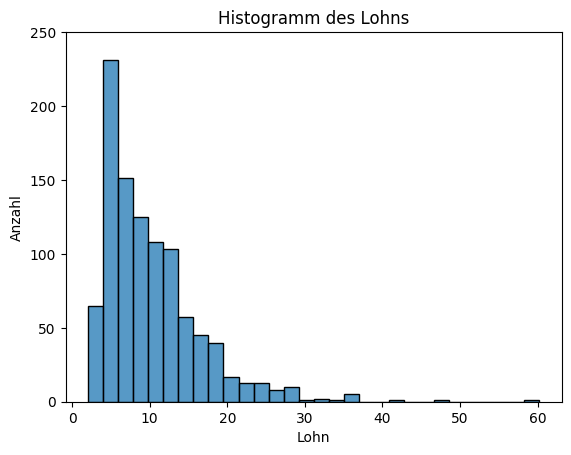

In [103]:
# Plot der Verteilung
sns.histplot(data=df["wage"], bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.xticks(np.arange(0, 70, step=10))
plt.yticks(np.arange(0, 260, step=50))
plt.show()

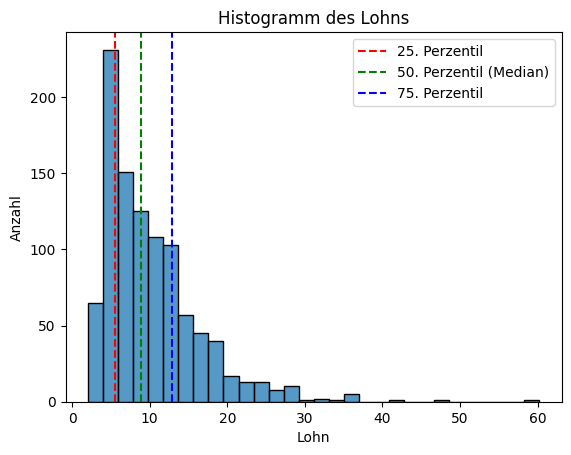

In [104]:
# Berechne die Perzentile (25., 50., 75.)
q25_wage = np.percentile(df['wage'], 25)
q50_wage = np.percentile(df['wage'], 50)  # Median
q75_wage = np.percentile(df['wage'], 75)

# Plot der Verteilung
sns.histplot(df['wage'], bins=30)

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_wage, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_wage, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_wage, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
plt.show()
# plt.savefig("Vis/Title_") # speicher die Visualisierung

### Korrelations Matrix
---
Folgenden Methoden sind möglich: `pearson, kendall, spearman`

In [105]:
df.corr(method = "pearson", numeric_only=True)

,wage,educ,exper,metro
wage,1.000000,0.449848,0.148045,0.118225
educ,0.449848,1.000000,-0.182577,0.065750
exper,0.148045,-0.182577,1.000000,-0.037250
metro,0.118225,0.065750,-0.037250,1.000000


Text(0.5, 1.0, 'Heatmap der Korrelationen')

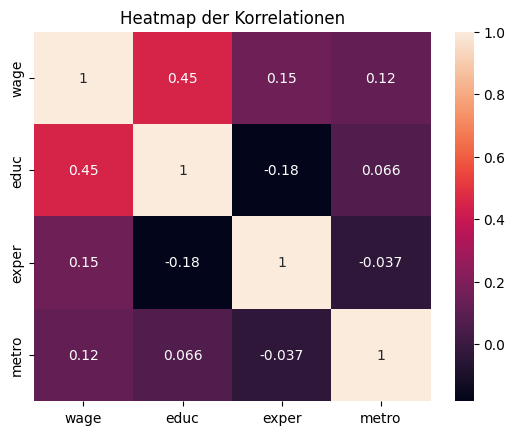

In [106]:
sns.heatmap(df.corr(method = "pearson", numeric_only=True), annot=True) 
plt.title("Heatmap der Korrelationen")
# in "method" kann du folgenden Mehthoden aussuchen pearson, kendall, spearman


# plt.savefig("Vis/Title_")

## Scatterplot
---

Text(0.5, 1.0, 'Scatterplot von Erfahrung und Lohn')

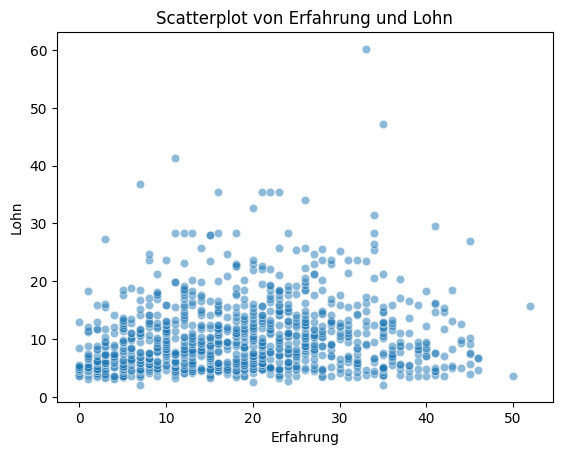

In [107]:
sns.scatterplot(data=df, x="exper", y="wage", alpha = 0.5 ) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
# plt.savefig("Vis/Title_") 

## Balkendiagramm
---

Text(0.5, 1.0, 'Metro und Lohn')

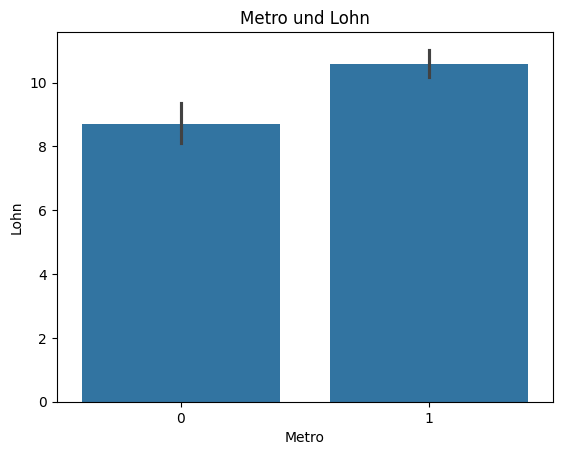

In [108]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
# plt.savefig("Vis/Title_")

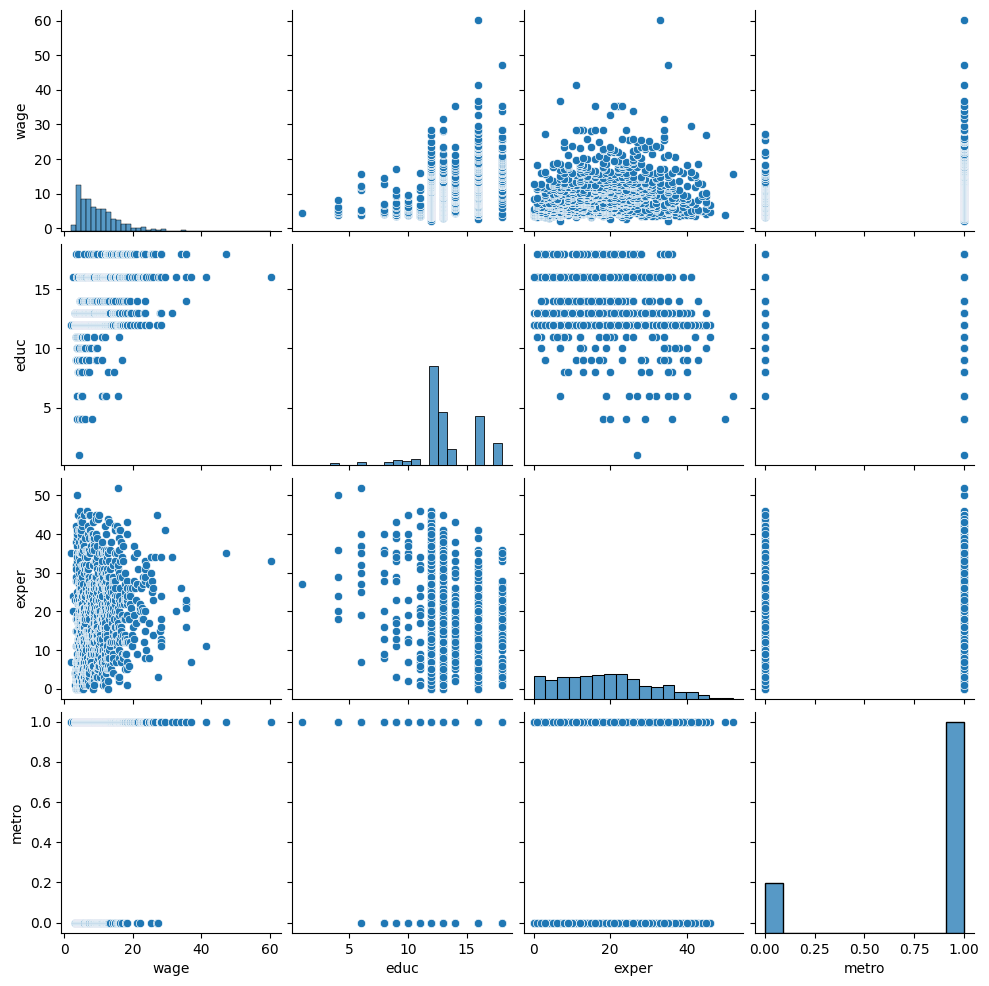

In [109]:
sns.pairplot(df)

## Regressions Analyse
---
Im folgenden erstellen wir nun eine Mutiple Lineare Regression

#### Formel:
`wage ~ educ + exper + metro`

In [110]:
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Lege deine abhängige und unabhängige Variable fest

- In der `Variable X` erstellen wir ein neues Dataframe nur mit den Spalten educ, exper, metro

- In der `Variable Y` erstellen wir ein neues Dataframe nur mit den Spalte wage die wir demenstsprechend auch vorhersagen möchten

In [111]:
X = df[["educ", "exper", "metro"]] 
y = df["wage"]

### Erstelle deine Regression:
Regressionen können auf viele wege erstellt werden wir arbeiten nun mit dem Package Statsmodels da diese viele Metriken uns wiedergeben

1. Möglichkeit:

In [112]:
X = sm.add_constant(X)
model_stats = sm.OLS(y, X)
model = model_stats.fit()

print(model.summary())


with open('MLP_Output/summary.txt', 'w') as fh:
    fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        18:03:26   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.077     -9.154      0.0

In [113]:
parameter = model.params
parameter

const   -9.858057
educ     1.232183
exper    0.132734
metro    1.509102
dtype: float64

Formel: y_hat = intercept + b1 * educ + b1 * exper + b1 * educ + b1 * metro

In [114]:
educ = 12
exper = 10
metro = 0

y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro

print(y_hat)

7.764586743953391


In [115]:
df.query('educ == 12 & exper == 10 & metro == 0')

,wage,educ,exper,metro
326,6.45,12,10,0


### 2. Möglicheit die mehr an R erinnert:

In [116]:
from statsmodels.formula.api import ols 
linear_model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        18:03:26   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8581      1.077     -9.154      0.0

## Konfidenz Intervalle:
---

In [117]:
# Calculate the 99% confidence intervals for the model's parameters
conf_intervals = linear_model.conf_int()
conf_intervals = conf_intervals.rename(columns={0: '0.5 %', 1: '99.5 %'})
conf_intervals


,0.5 %,99.5 %
Intercept,-11.971362,-7.744752
educ,1.094872,1.369494
exper,0.102807,0.162662
metro,0.661185,2.357020


## Vorhersagen treffen:

In [118]:
prediction = linear_model.predict(df[["educ","exper","metro"]])
prediction[:5] # Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]

0     7.366383
1    11.082949
2    14.020664
3     9.622870
4     8.200363
dtype: float64

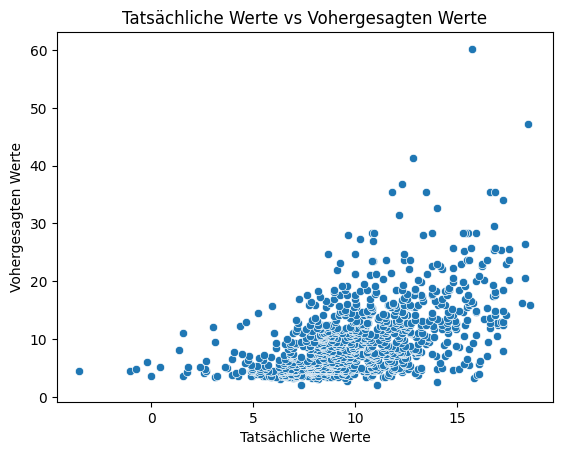

In [119]:
sns.scatterplot(x=prediction, y=df["wage"])
plt.title("Tatsächliche Werte vs Vohergesagten Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vohergesagten Werte")
plt.savefig("Vis/Title_")

## Residuale 
---

### Residuale berechen

1. Möglichkeit durch eine eingbaute Funktion:

In [120]:
residuals = linear_model.resid
residuals

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

2. Möglichkeit eigene berechnung:

In [121]:
residuals_model = df["wage"] - prediction # tatsächliche Werte - Vorhersagen
residuals_model

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

In [122]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df["wage"] - df["wage"].mean())**2).sum()

# R-squared
R_squared = 1 - (SSResiduals/SSTotal)
print("R_squared:", R_squared)

R_squared: 0.2661773034647066


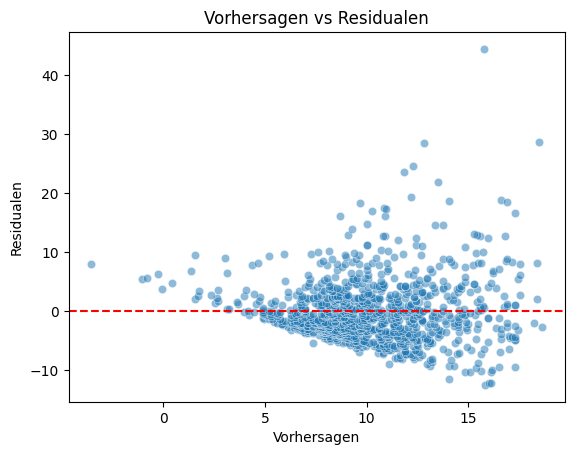

<Figure size 640x480 with 0 Axes>

In [123]:
# Vorhersagen (Predictions)
predictions = linear_model.fittedvalues

# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(x=predictions, y=residuals, alpha = 0.5)
plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")
plt.savefig("Vis/Title_Residuals_vs_Predictions.png")
plt.show()
plt.savefig("Vis/Title_")

In [124]:
print(linear_model.fittedvalues.mean())
print(linear_model.predict().mean())

10.228276573146296
10.228276573146296


<Axes: >

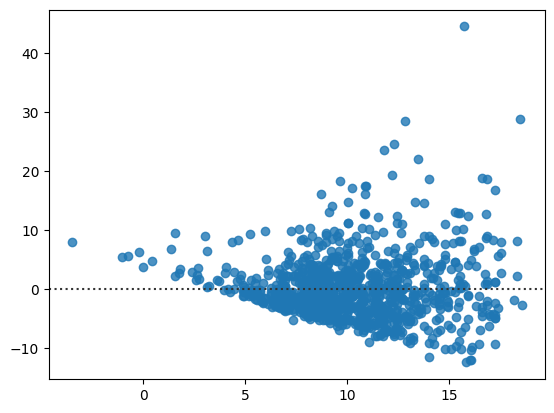

In [125]:
sns.residplot(x=prediction, y=residuals)

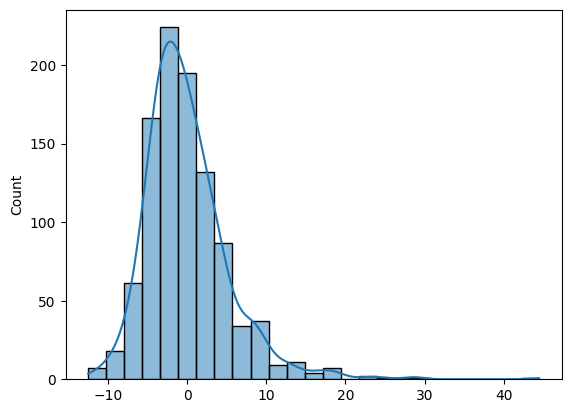

In [126]:
model_residuals = model.resid
sns.histplot(model_residuals, kde=True, bins=25)
plt.savefig("Vis/Title_")

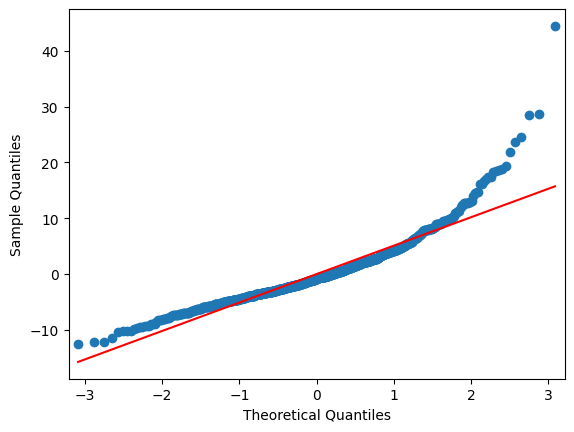

<Figure size 640x480 with 0 Axes>

In [127]:
fig = sm.qqplot(residuals, line="r")
plt.show()
plt.savefig("Vis/Title_")

### Analysis of variance (Anova)

In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

             df        sum_sq      mean_sq           F        PR(>F)
educ        1.0   7864.802216  7864.802216  274.111805  1.465272e-54
exper       1.0   2130.117614  2130.117614   74.240950  2.684887e-17
metro       1.0    349.980991   349.980991   12.197881  4.994939e-04
Residual  994.0  28519.798334    28.691950         NaN           NaN


## Simple Lineare Regression aufbauen
---

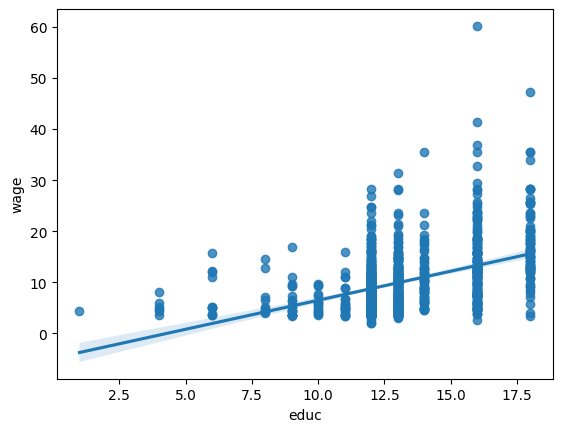

In [129]:
sns.regplot(data = df, x="educ", y ="wage")
plt.savefig("Vis/Title_")

<Axes: xlabel='exper', ylabel='wage'>

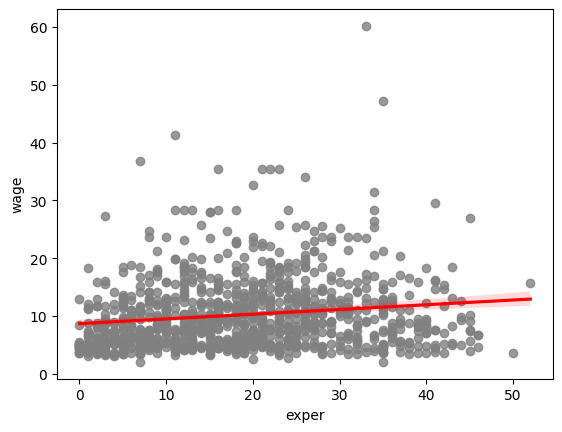

In [130]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
# plt.savefig("Vis/Title_")

<Axes: xlabel='metro', ylabel='wage'>

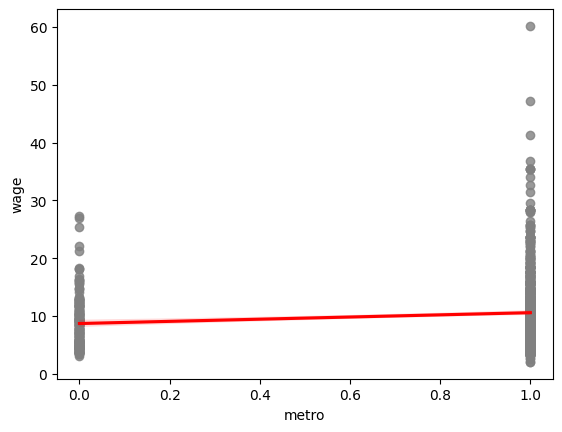

In [131]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

# plt.savefig("Vis/Title_")

### Analysis of variance (Anova)

In [132]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

             df        sum_sq      mean_sq           F        PR(>F)
educ        1.0   7864.802216  7864.802216  274.111805  1.465272e-54
exper       1.0   2130.117614  2130.117614   74.240950  2.684887e-17
metro       1.0    349.980991   349.980991   12.197881  4.994939e-04
Residual  994.0  28519.798334    28.691950         NaN           NaN


## Heteroskedasticity testen

In [133]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [134]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    linear_model.resid, linear_model.model.exog)


print(f"LM Statistic: {bp_lm}")
print(f"LM p-value: {bp_lm_pvalue}")
print(f"F Statistic: {bp_fvalue}")
print(f"F p-value: {bp_f_pvalue}")

LM Statistic: 42.76916568859225
LM p-value: 2.7549846935235586e-09
F Statistic: 14.835000842180893
F p-value: 1.872207806675279e-09


In [135]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     80.93
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           7.59e-47
Time:                        18:03:27   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.213     -8.129      0.0

## Multikollinearität
---

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Berechnung nur für die Variablen in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Berechne den VIF für jede unabhängige Variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature        VIF
0   const  40.340431
1    educ   1.038221
2   exper   1.035169
3   metro   1.005007


## Polynomial-Regression
---

In [137]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [138]:
ice_creamdf = pd.read_csv("Data/ice_cream_sales.csv", sep=',')
ice_creamdf.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [139]:
X_poly = ice_creamdf["Temperature (°C)"].values.reshape(-1,1)
X_log = sm.add_constant(X_poly)
y_poly = ice_creamdf["Ice Cream Sales (units)"].values

In [140]:
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X_poly)
xp.shape

(49, 3)

In [141]:
model_poly = sm.OLS(y_poly, xp).fit()
ypred_poly = model_poly.predict(xp) 

ypred_poly.shape

(49,)

In [142]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     315.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.35e-27
Time:                        18:03:28   Log-Likelihood:                -125.95
No. Observations:                  49   AIC:                             257.9
Df Residuals:                      46   BIC:                             263.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9518      0.710      4.159      0.000       1.523       4.380
x1            -0.8247      0.175     -4.722      0.000      -1.176      -0.473
x2             1.8295      0.074     24.715      0.000       1.681       1.979
==============================================================================
Omnibus:                        3.209   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.666
Skew:                          -0.101   Prob(JB):                        0.435
Kurtosis:                       2.120   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

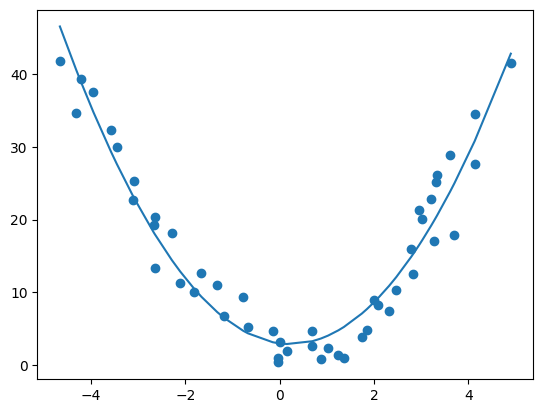

In [143]:
plt.scatter(X_poly,y_poly)
plt.plot(X_poly,ypred_poly)

## Log-Log Model:

---

In [144]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'X': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 4, 8, 16, 32]
}

df = pd.DataFrame(data)

# Logarithmieren der Variablen
df['log_X'] = np.log(df['X'])
df['log_y'] = np.log(df['y'])

# Hinzufügen einer Konstante für den Intercept
X_log = sm.add_constant(df['log_X'])

# Erstelle das log-log Modell
model = sm.OLS(df['log_y'], X_log)
results = model.fit()

# Ausgabe der Ergebnisse
print(results.summary())

# Vorhersagen treffen
y_pred_log = results.predict(X_log)


                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.76
Date:                Fri, 04 Oct 2024   Prob (F-statistic):            0.00156
Time:                        18:03:28   Log-Likelihood:                -1.2669
No. Observations:                   6   AIC:                             6.534
Df Residuals:                       4   BIC:                             6.117
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3435      0.309     -1.110      0.3